In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DELL\Downloads\SampleSuperstore.csv", encoding='latin1')
print(df.head(5))


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6-16-2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10-18-2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10-18-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

# Simulate Customer Age (if missing)

In [4]:
np.random.seed(0)
df['Customer Age'] = np.random.randint(18, 65, size=len(df))

# Group by category and compute average age

In [5]:
category_age = df.groupby('Category')['Customer Age'].mean().reset_index()

print(category_age)


          Category  Customer Age
0        Furniture     41.194719
1  Office Supplies     41.006472
2       Technology     41.467786


# Boxplot to show age distribution per category

C:\Users\DELL\AppData\Local\Temp\ipykernel_47728\3137160717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Customer Age', palette='Set2')


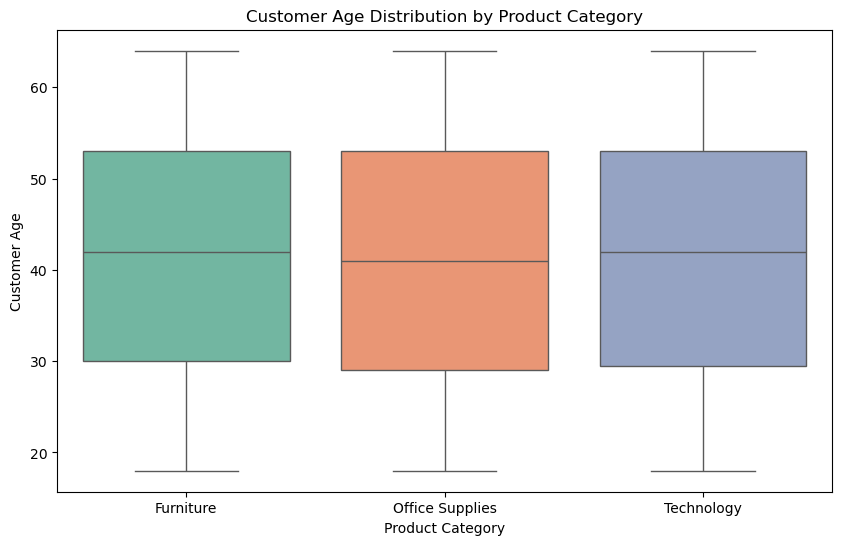

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Customer Age', palette='Set2')
plt.title('Customer Age Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Customer Age')
plt.show()

# Encode category
# Correlation between age and encoded category

In [7]:

df['Category_Code'] = df['Category'].astype('category').cat.codes


correlation = df[['Customer Age', 'Category_Code']].corr()

print(correlation)


               Customer Age  Category_Code
Customer Age       1.000000       0.005687
Category_Code      0.005687       1.000000
